In [33]:
import pandas as pd
import numpy as np
import librosa
import cv2
import os
import glob
import seaborn as sns
from tqdm import tqdm
import IPython.display
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
pio.renderers.default = "notebook_connected"
import warnings
warnings.simplefilter("ignore")

import cosine_similarity as cs
import freq_dataset as fd
cos = cs.CosineSimilarity()
freq = fd.MakeFreqDataset()

s_path = "../../sounds/"

In [6]:
o_path = list(set(glob.glob(f'{s_path}*/*/*')))
path_ls = [file[3:] for file in o_path if file.endswith(".mp3") or file.endswith(".wav")]
name_ls = [name.split('/')[-1][:-4] for name in path_ls]
label_ls = [name.split('/')[-3] for name in path_ls]
info_df = pd.DataFrame()
info_df['path'] = path_ls
info_df['label'] = label_ls
info_df['name'] = name_ls
info_df

,path,label,name
0,../sounds/human/read_men/jYYHDnEnnDY.0347.wav,human,jYYHDnEnnDY.0347
1,../sounds/human/read_women/3_1580.wav,human,3_1580
2,../sounds/human/read_women/4_0083.wav,human,4_0083
3,../sounds/life/청소기 소리/2-122820-A-36.wav,life,2-122820-A-36
4,../sounds/human/read_men/3LR5IpiEvSc.0765.wav,human,3LR5IpiEvSc.0765
...,...,...,...
22499,../sounds/human/read_men/bM32LJFpAus.0538.wav,human,bM32LJFpAus.0538
22500,../sounds/human/read_women/3_1530.wav,human,3_1530
22501,../sounds/human/read_women/2_0042.wav,human,2_0042
22502,../sounds/human/read_women/4_5011.wav,human,4_5011


In [8]:
def calc_duration(path_ls):
    length_ls = []
    for p in tqdm(path_ls):
        try:
            audio = wave.open(p)
            frames = audio.getnframes()
            rate = audio.getframerate()
            duration = frames / float(rate)
        except:
            y, sr = librosa.load(p, sr=16000)
            duration = len(y)/sr
        length_ls.append(duration)
    return length_ls

In [7]:
calc_duration(result_df['path'][:5])

[4.316, 1.8540625, 1.0845, 2.948, 12.0]

In [9]:
result_df = pd.read_csv("../files/freq_final_dataset.csv", encoding='utf-8-sig')
result_df.drop(["Unnamed: 0", "label"], axis=1, inplace=True)
result_df['path'] = [p.replace('original/clean', 'original_clean') for p in result_df['path']]
result_df['path'] = [p.replace('original/noise', 'original_noise') for p in result_df['path']]
path_ls = result_df['path'].copy()
result_df['path'] = [p.replace('human/read_women', 'human_voice/read_women') for p in result_df['path']]
result_df['path'] = [p.replace('human/read_men', 'human_voice/read_men') for p in result_df['path']]
result_df['path'] = [p.replace('human/영어리딩', 'human_voice/영어리딩') for p in result_df['path']]
result_df['path'] = [p.replace('human/original_noise', 'human_voice/original_noise') for p in result_df['path']]
result_df['path'] = [p.replace('human/original_clean', 'human_voice/original_clean') for p in result_df['path']]
result_df['cate1'] = [p.split('/')[-3] for p in result_df['path']]
result_df['cate2'] = [p.split('/')[-1][:3] if p.split('/')[-2] == 'cats_dogs' else p.split('/')[-2] for p in result_df['path']]
result_df['path'] = "../"+path_ls
result_df['duration'] =  calc_duration(result_df['path'])
result_df

100%|██████████| 22504/22504 [1:57:09<00:00,  3.20it/s]    


,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate1,cate2,duration
0,cat_119,0.284324,0.080283,0.116524,0.035035,1061.271547,1.547536e+05,1329.783998,44388.201164,2001.603846,...,42.138844,5.225847,39.697083,5.260680,33.465557,../../sounds/animal/cats_dogs/cat_119.wav,clean,animal,cat,4.316000
1,dog_barking_100,0.426439,0.109916,0.032564,0.004489,1626.752143,1.490662e+05,1644.495521,70639.091223,3268.740234,...,36.275764,-2.387175,70.726715,3.296551,93.897987,../../sounds/animal/cats_dogs/dog_barking_100.wav,clean,animal,dog,1.854062
2,cat_54,0.203641,0.089293,0.181991,0.005883,2344.144335,3.235486e+05,1503.098172,33353.104390,3627.886573,...,70.673302,17.618805,178.355392,0.816697,176.787277,../../sounds/animal/cats_dogs/cat_54.wav,clean,animal,cat,1.084500
3,cat_15,0.404880,0.133895,0.097528,0.006318,1510.993042,3.345212e+05,1674.112362,258817.119037,3113.328156,...,175.291428,5.300216,83.345917,6.450485,57.837170,../../sounds/animal/cats_dogs/cat_15.wav,clean,animal,cat,2.948000
4,cat_30,0.404268,0.094998,0.072871,0.005941,1547.687106,4.278606e+04,1453.063485,79612.852737,2804.668469,...,52.483185,0.625472,51.724159,3.752055,45.712337,../../sounds/animal/cats_dogs/cat_30.wav,clean,animal,cat,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,UO62_2_3_0_19_0_0_0,0.596687,0.063218,0.017606,0.000238,3012.822673,1.413769e+06,2055.704305,183494.121478,5502.331543,...,61.895054,4.017175,53.293667,-3.685825,27.531643,../../sounds/human/read_women/4_2835.wav,NaN,human_voice,read_women,3.111500
22500,jYYHDnEnnDY.0532,0.480263,0.101976,0.073356,0.005532,1546.017759,5.349460e+05,2091.387153,480797.826176,3599.353096,...,53.615490,-2.828741,37.364723,0.695443,44.442627,../../sounds/human/read_men/3LR5IpiEvSc.1059.wav,NaN,human_voice,read_men,2.280000
22501,QHOC_5_9_0_23_0_0_0,0.562584,0.066113,0.016748,0.000298,1873.343338,5.913499e+05,1825.989854,68530.194293,3769.387207,...,39.740143,1.627433,28.773853,-3.702916,46.514179,../../sounds/human/read_men/nVToV-zn_C4.0677.wav,NaN,human_voice,read_men,3.571000
22502,4_2566,0.341139,0.119525,0.062649,0.002389,1882.043797,1.079272e+06,2124.615936,461103.723759,3737.829425,...,128.742050,-1.848811,201.917435,1.630757,307.923187,../../sounds/human/read_women/3_4288.wav,NaN,human_voice,read_women,3.343688


In [64]:
result_df['duration'].describe()

count    22504.000000
mean         5.168392
std         63.780194
min          0.121000
25%          2.925750
50%          3.849188
75%          5.000000
max       4279.688000
Name: duration, dtype: float64

In [216]:
result_df[result_df['duration']>100]

,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate1,cate2,duration
7487,3_0758,0.383665,0.108239,0.061335,0.002964,2343.108113,1.630342e+06,2251.525393,551663.681367,4521.288075,...,83.278877,-3.932523,83.987740,0.482147,186.422287,../../sounds/human/read_men/bM32LJFpAus.wav,NaN,human_voice,read_men,4279.688
10487,3-159346-A-36,0.652443,0.039083,0.098457,0.000013,2386.949246,4.305130e+03,2284.918603,871.839860,5066.234334,...,11.136207,-6.129410,9.850458,1.925542,10.498881,../../sounds/human/read_men/bM32LJFpAus.wav,NaN,human_voice,read_men,4279.688
13487,1_0822,0.271935,0.110136,0.106453,0.002996,2140.684146,1.427549e+06,2386.617141,244388.751434,4153.738190,...,451.921021,0.669003,313.385742,6.920503,276.752228,../../sounds/human/read_men/bM32LJFpAus.wav,NaN,human_voice,read_men,4279.688
18487,3JO1_5_12_0_23_0_0_0,0.471466,0.121413,0.030488,0.000978,1362.957237,7.684535e+05,1603.431421,303523.644129,3015.737195,...,31.104424,1.322357,37.280510,7.861284,61.104828,../../sounds/human/read_men/bM32LJFpAus.wav,NaN,human_voice,read_men,4279.688
20987,2_0920,0.371648,0.115698,0.058794,0.002742,2506.634411,2.232970e+06,2180.724837,490007.754311,4625.391846,...,79.172073,-4.930048,98.292732,2.570859,143.586792,../../sounds/human/read_men/bM32LJFpAus.wav,NaN,human_voice,read_men,4279.688


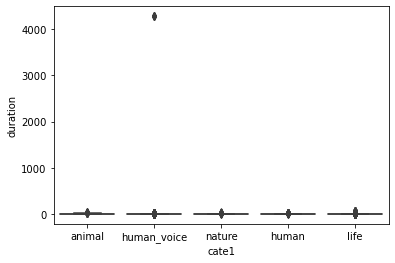

In [54]:
sns.boxplot(data=result_df, x='cate1', y='duration');

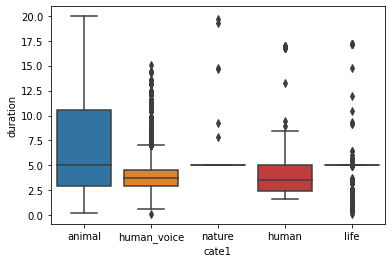

In [53]:
sns.boxplot(data=result_df[result_df['duration']<20], x='cate1', y='duration');

In [258]:
result_df.groupby('cate1').mean()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,duration
cate1,,,,,,,,,,,,,,,,,,,,,
animal,0.382316,0.099609,0.073530,0.004086,1666.187631,6.421038e+05,1687.695714,230283.967714,3211.173737,2.524552e+06,...,90.727292,0.677541,89.345051,-1.802765,106.174510,-0.522450,110.490895,1.114254,124.879298,6.612876
human,0.400187,0.109281,0.062208,0.003775,2041.551571,1.153770e+06,2111.577316,435385.349373,4058.768204,4.619351e+06,...,85.640362,-0.546343,94.770195,-1.289816,136.345021,-1.226039,137.055026,3.100816,166.133673,4.163581
human_voice,0.402472,0.108043,0.062184,0.003707,2043.950679,1.137258e+06,2108.488908,424057.503760,4053.603340,4.555316e+06,...,86.473022,-0.420956,95.080383,-1.166721,132.890433,-1.264752,133.265466,2.641721,157.244546,5.023963
life,0.407256,0.108242,0.063424,0.003730,2070.770346,1.119959e+06,2144.289869,411640.395559,4127.242043,4.524784e+06,...,88.465244,-0.418448,97.497410,-1.118860,135.469100,-1.230712,140.767256,3.022383,165.735972,5.383622
nature,0.559353,0.060110,0.068749,0.002420,2632.020838,1.941603e+05,2088.877403,102033.395547,4735.111962,7.448991e+05,...,21.908848,-0.463164,20.680098,-1.070060,21.029369,-1.618563,21.766757,1.090146,20.124232,6.204728


In [254]:
result_df[result_df['duration']>20].groupby('cate1').count()

,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate2,duration
cate1,,,,,,,,,,,,,,,,,,,,,
animal,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,0,32,32
human,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,0,13,13
human_voice,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,5,5
life,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,0,27,27
nature,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [61]:
result_df[result_df['duration']<1].groupby('cate1').count()

,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate2,duration
cate1,,,,,,,,,,,,,,,,,,,,,
animal,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,24,86,86
human_voice,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,0,15,15
life,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,0,56,56


In [75]:
long_out = result_df[result_df['duration']>20].index.tolist()
short_out = result_df[result_df['duration']<1].index.tolist()
print("너무 긴 outlier 제외: ", len(long_out))
print("너무 짧은 outlier 제외: ", len(short_out))

너무 긴 outlier 제외:  87
너무 짧은 outlier 제외:  157


In [76]:
final_df = result_df.drop(long_out+short_out, axis=0)
final_df

,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate1,cate2,duration
0,cat_119,0.284324,0.080283,0.116524,0.035035,1061.271547,1.547536e+05,1329.783998,44388.201164,2001.603846,...,42.138844,5.225847,39.697083,5.260680,33.465557,../../sounds/animal/cats_dogs/cat_119.wav,clean,animal,cat,4.316000
1,dog_barking_100,0.426439,0.109916,0.032564,0.004489,1626.752143,1.490662e+05,1644.495521,70639.091223,3268.740234,...,36.275764,-2.387175,70.726715,3.296551,93.897987,../../sounds/animal/cats_dogs/dog_barking_100.wav,clean,animal,dog,1.854062
2,cat_54,0.203641,0.089293,0.181991,0.005883,2344.144335,3.235486e+05,1503.098172,33353.104390,3627.886573,...,70.673302,17.618805,178.355392,0.816697,176.787277,../../sounds/animal/cats_dogs/cat_54.wav,clean,animal,cat,1.084500
3,cat_15,0.404880,0.133895,0.097528,0.006318,1510.993042,3.345212e+05,1674.112362,258817.119037,3113.328156,...,175.291428,5.300216,83.345917,6.450485,57.837170,../../sounds/animal/cats_dogs/cat_15.wav,clean,animal,cat,2.948000
4,cat_30,0.404268,0.094998,0.072871,0.005941,1547.687106,4.278606e+04,1453.063485,79612.852737,2804.668469,...,52.483185,0.625472,51.724159,3.752055,45.712337,../../sounds/animal/cats_dogs/cat_30.wav,clean,animal,cat,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,UO62_2_3_0_19_0_0_0,0.596687,0.063218,0.017606,0.000238,3012.822673,1.413769e+06,2055.704305,183494.121478,5502.331543,...,61.895054,4.017175,53.293667,-3.685825,27.531643,../../sounds/human/read_women/4_2835.wav,NaN,human_voice,read_women,3.111500
22500,jYYHDnEnnDY.0532,0.480263,0.101976,0.073356,0.005532,1546.017759,5.349460e+05,2091.387153,480797.826176,3599.353096,...,53.615490,-2.828741,37.364723,0.695443,44.442627,../../sounds/human/read_men/3LR5IpiEvSc.1059.wav,NaN,human_voice,read_men,2.280000
22501,QHOC_5_9_0_23_0_0_0,0.562584,0.066113,0.016748,0.000298,1873.343338,5.913499e+05,1825.989854,68530.194293,3769.387207,...,39.740143,1.627433,28.773853,-3.702916,46.514179,../../sounds/human/read_men/nVToV-zn_C4.0677.wav,NaN,human_voice,read_men,3.571000
22502,4_2566,0.341139,0.119525,0.062649,0.002389,1882.043797,1.079272e+06,2124.615936,461103.723759,3737.829425,...,128.742050,-1.848811,201.917435,1.630757,307.923187,../../sounds/human/read_women/3_4288.wav,NaN,human_voice,read_women,3.343688


count    22260.000000
mean         4.146259
std          2.010661
min          1.014063
25%          2.940000
50%          3.854563
75%          4.996375
max         19.957563
Name: duration, dtype: float64


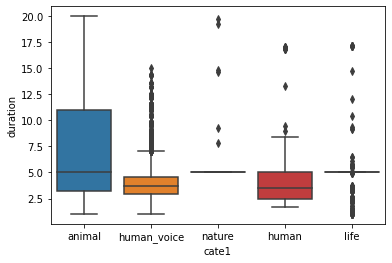

In [79]:
print(final_df['duration'].describe())
sns.boxplot(data=final_df, x='cate1', y='duration');

---
# 분류

In [130]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import pickle
import joblib
import seaborn as sns

In [131]:
def play_song(path):
    (file_dir, file_id) = os.path.split(path)
    print(file_id[:-4])
    print(IPython.display.display(IPython.display.Audio(path)))
def play_song_ls(cm_lr_df):
    for idx, path in enumerate(cm_lr_df['path']):
        print(cm_lr_df['pred'].iloc[idx])
        play_song(path)

In [123]:
def make_train_test(df):
    df = df.sample(frac=1)
    X = df.set_index('path').drop(['name','noise','cate1','cate2','duration'], axis=1)
    y = df.set_index('path')[['cate1']].copy()
    print(f"X 개수:{len(X)}, y 개수:{len(y)}")
    print(df.groupby('cate1').count().sort_values('name')[['name']])
    return X, y

In [132]:
def model_fit_kfold(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    print("accuracy:", round(accuracy_score(y_test, y_pred),6))
    print("recall:", round(recall_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
    print("f1 score:", round(f1_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
    print("Cross Validation Score:", cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=kfold))
    ax = sns.heatmap(cf, annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), fmt="d", cmap="Blues")
    plt.title(str(model).split('(')[0])
    plt.show()
    return model, y_pred

In [133]:
def check_false_pred(y_pred):
    cm_lr_df = pd.DataFrame()
    cm_lr_df['answer'] = y_test['cate1'].tolist()
    cm_lr_df['pred'] = y_pred
    cm_lr_df['result'] = cm_lr_df['answer'] == cm_lr_df['pred']
    cm_lr_df['path'] = X_test.index
    cm_lr_df['cate1'] = [result_df[result_df['path']== p]['cate1'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['noise'] = [result_df[result_df['path']== p]['noise'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['name'] = [f"{p.split('/')[-2]}__{p.split('/')[-1][:-4]}" for p in cm_lr_df['path']]
#     [l.split('/')[-1]for l in cm_lr_df['path']]
    cm_lr_df = cm_lr_df[cm_lr_df['result']==False].sort_values(['answer', 'cate1'])
    return cm_lr_df

---
# short_df
- 노래 길이 백분위 50% 미만 데이터 기준

11098
cate1
animal          579
human           498
human_voice    9880
life            141
Name: duration, dtype: int64
count    11098.000000
mean         2.860932
std          0.652973
min          1.014063
25%          2.414938
50%          2.930063
75%          3.398984
max          3.850500
Name: duration, dtype: float64


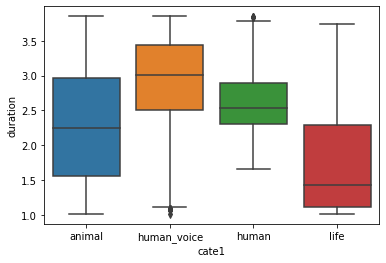

In [259]:
short_df = final_df[final_df['duration']<np.percentile(final_df['duration'], 50)]#[final_df['duration']>np.percentile(final_df['duration'], 25)]
print(len(short_df))
print(short_df.groupby('cate1')['duration'].count())
print(short_df['duration'].describe())
sns.boxplot(data=short_df, x='cate1', y='duration');

## Test dataset 만들기

In [261]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = short_df.copy()
test_df.drop(result_df[result_df['cate2']=='영어리딩'].index, axis=0, inplace=True)
# test_nature = test_df[test_df['cate1']=='nature'].sample(n=80, random_state=1)
test_human = test_df[test_df['cate1']=='human'].sample(n=50, random_state=13)
test_life = test_df[test_df['cate1']=='life'].sample(n=50, random_state=13)
test_animal = test_df[test_df['cate1']=='animal'].sample(n=50, random_state=13)
test_human_voice = test_df[test_df['cate1']=='human_voice'].sample(n=50, random_state=13)
test_df = pd.concat([test_human,test_life, test_animal, test_human_voice]) #test_nature 
test_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
animal,50
human,50
human_voice,50
life,50


In [262]:
X_test, y_test = make_train_test(test_df)

X 개수:200, y 개수:200
             name
cate1            
animal         50
human          50
human_voice    50
life           50


In [263]:
train_df = short_df.drop(test_df.index, axis=0)
train_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
life,91
human,448
animal,529
human_voice,9830


### 1. 5개의 라벨을 모두 같은 개수로 맞춰서 테스트
- groupby().sample
- RandomUnderSampler

In [264]:
# 방법1: pandas의 groupby().sample으로 라벨별 개수 맞추기
try1_df = train_df.groupby('cate1').sample(n=91, random_state=13)
X_train, y_train = make_train_test(try1_df)
print('------------------------')
X, y = make_train_test(pd.concat([test_df, try1_df]))

X 개수:364, y 개수:364
             name
cate1            
animal         91
human          91
human_voice    91
life           91
------------------------
X 개수:564, y 개수:564
             name
cate1            
animal        141
human         141
human_voice   141
life          141


---------LogisticRegression---------------
accuracy: 0.285
recall: 0.285
f1 score: 0.245565
Cross Validation Score: [0.32743363 0.38938053 0.28318584 0.27433628 0.33035714]


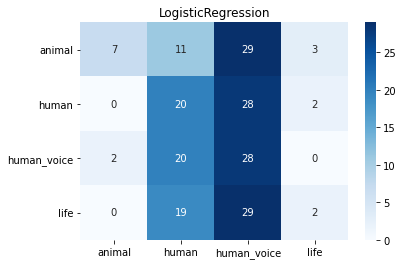

---------DecisionTreeClassifier---------------
accuracy: 0.38
recall: 0.38
f1 score: 0.389249
Cross Validation Score: [0.39823009 0.38938053 0.38053097 0.32743363 0.39285714]


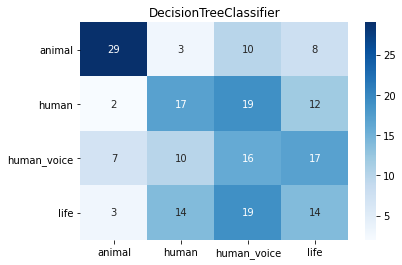

---------XGBClassifier---------------
accuracy: 0.415
recall: 0.415
f1 score: 0.42686
Cross Validation Score: [0.42477876 0.46017699 0.33628319 0.42477876 0.34821429]


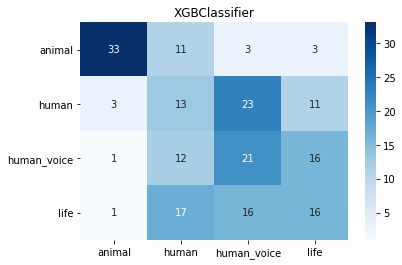

---------RandomForestClassifier---------------
accuracy: 0.385
recall: 0.385
f1 score: 0.377946
Cross Validation Score: [0.38938053 0.44247788 0.34513274 0.43362832 0.34821429]


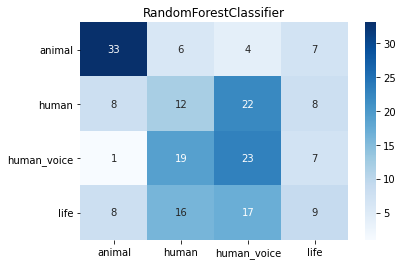

In [265]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

### 2. 모델 파라미터에 weights 적용하기
- abnomal 데이터에서 oversamping, undersamping 같은 개념으로 class_weights를 주어 라벨별 불균형을 맞출 수 있음
- 샘플링을 하지 않고, 개수가 제일 많은 human_voice을 기준점으로 두고 weights 적용
- human	75
animal	200
human_voice	7328

In [239]:
weights = {'animal': 5, 'human': 10} # 'life': 2.5} #, 'nature': 20}
X, y = make_train_test(short_df)
X_test, y_test = make_train_test(test_df)
# train_df = result_df.drop(test_df.index, axis=0)

X 개수:7776, y 개수:7776
             name
cate1            
life           23
human         125
animal        250
human_voice  7378
X 개수:150, y 개수:150
             name
cate1            
animal         50
human          50
human_voice    50


---------LogisticRegression---------------
accuracy: 0.4
recall: 0.4
f1 score: 0.30954
Cross Validation Score: [0.45333333 0.46666667 0.49333333 0.42666667 0.56      ]


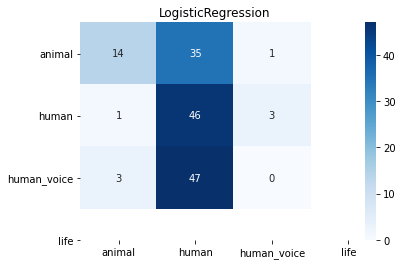

---------DecisionTreeClassifier---------------
accuracy: 0.466667
recall: 0.466667
f1 score: 0.472686
Cross Validation Score: [0.42666667 0.41333333 0.37333333 0.57333333 0.61333333]


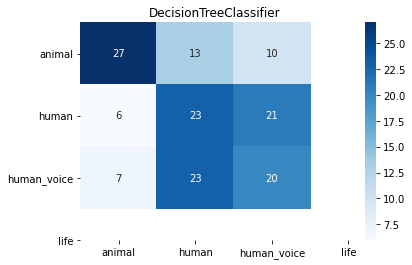

---------XGBClassifier---------------
[20:22:10] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.446667
recall: 0.446667
f1 score: 0.449334
[20:22:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might no

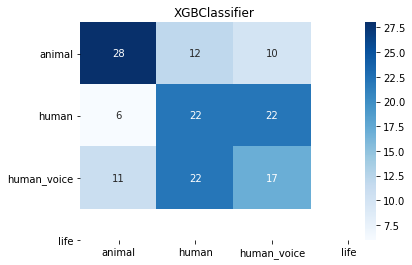

---------RandomForestClassifier---------------
accuracy: 0.433333
recall: 0.433333
f1 score: 0.438123
Cross Validation Score: [0.45333333 0.4        0.50666667 0.54666667 0.6       ]


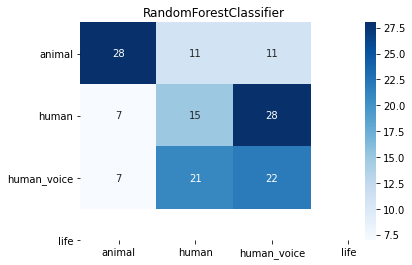

In [240]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression(class_weight=weights))
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier(class_weight=weights))
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss',
                                           scale_pos_weight=10))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(class_weight=weights,
                                                             n_estimators=10, random_state=13, oob_score=True))

### 3. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [266]:
X_test, y_test = make_train_test(test_df)
# train_df = short_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate1').count()

X 개수:200, y 개수:200
             name
cate1            
animal         50
human          50
human_voice    50
life           50
X 개수:10898, y 개수:10898
             name
cate1            
life           91
human         448
animal        529
human_voice  9830


,index
cate1,
animal,9909
human,9842
human_voice,9830
life,9840


---------LogisticRegression---------------
accuracy: 0.28
recall: 0.28
f1 score: 0.282542
Cross Validation Score: [0.32630915 0.35310449 0.28811206 0.29416961 0.2727158 ]


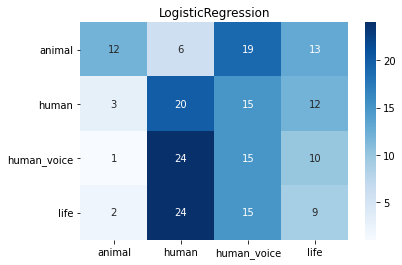

---------DecisionTreeClassifier---------------
accuracy: 0.33
recall: 0.33
f1 score: 0.285007
Cross Validation Score: [0.86523659 0.87834427 0.85764765 0.86244321 0.87203433]


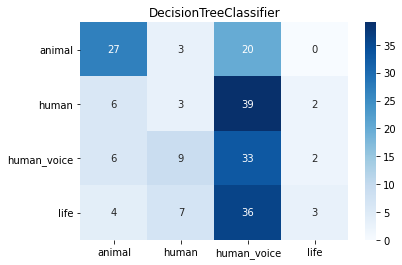

---------XGBClassifier---------------
accuracy: 0.42
recall: 0.42
f1 score: 0.325052
Cross Validation Score: [0.9481388  0.94649167 0.94750126 0.95254922 0.94586068]


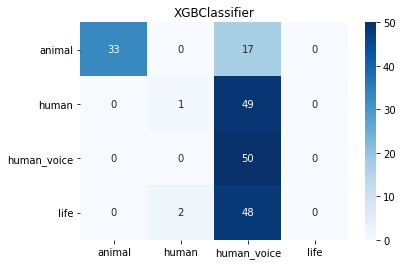

---------RandomForestClassifier---------------
accuracy: 0.41
recall: 0.41
f1 score: 0.341305
Cross Validation Score: [0.9437224  0.9434629  0.93879354 0.93980313 0.94119132]


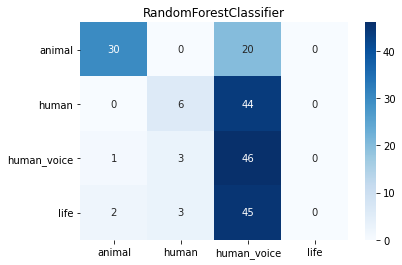

In [267]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

In [86]:
# 모델 저장
joblib.dump(dt_model, 'models/DTC_35.pkl')
joblib.dump(xgb_model, 'models/XGB_40.pkl')
joblib.dump(rf_model, 'models/RF_37.pkl')

['models/RF_37.pkl']

---
# long_df
- 노래 길이 백분위 50% 이상 데이터 기준

11162
cate1
animal         1413
human           414
human_voice    8134
life            995
nature          206
Name: duration, dtype: int64
count    11162.000000
mean         5.424217
std          2.088708
min          3.854563
25%          4.365375
50%          4.989125
75%          5.340000
max         19.957563
Name: duration, dtype: float64


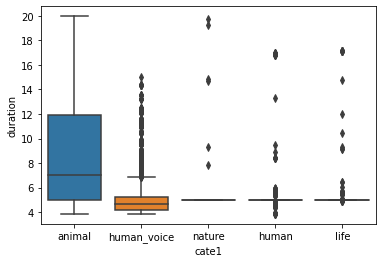

In [252]:
long_df = final_df[final_df['duration']>=np.percentile(final_df['duration'], 50)]
print(len(long_df))
print(long_df.groupby('cate1')['duration'].count())
print(long_df['duration'].describe())
sns.boxplot(data=long_df, x='cate1', y='duration');

In [162]:
X, y = make_train_test(long_df)

X 개수:10020, y 개수:10020
             name
cate1            
nature        206
human         404
life          995
animal       1371
human_voice  7044


## Test dataset 만들기

In [192]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = long_df.copy()
# test_df.drop(result_df[result_df['cate2']=='영어리딩'].index, axis=0, inplace=True)
test_nature = test_df[test_df['cate1']=='nature'].sample(n=100, random_state=1)
test_human = test_df[test_df['cate1']=='human'].sample(n=100, random_state=1)
test_life = test_df[test_df['cate1']=='life'].sample(n=100, random_state=1)
test_animal = test_df[test_df['cate1']=='animal'].sample(n=100, random_state=1)
test_human_voice = test_df[test_df['cate1']=='human_voice'].sample(n=100, random_state=1)
test_df = pd.concat([test_nature, test_human, test_life, test_animal, test_human_voice])
test_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
animal,100
human,100
human_voice,100
life,100
nature,100


In [167]:
X_test, y_test = make_train_test(test_df)

X 개수:500, y 개수:500
             name
cate1            
animal        100
human         100
human_voice   100
life          100
nature        100


In [168]:
train_df = long_df.drop(test_df.index, axis=0)
train_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
nature,106
human,304
life,895
animal,1271
human_voice,6944


### 1. 5개의 라벨을 모두 같은 개수로 맞춰서 테스트
- groupby().sample
- RandomUnderSampler

In [169]:
# 방법1: pandas의 groupby().sample으로 라벨별 개수 맞추기
try1_df = train_df.groupby('cate1').sample(n=106, random_state=13)
X_train, y_train = make_train_test(try1_df)
print('------------------------')
X, y = make_train_test(pd.concat([test_df, try1_df]))

X 개수:530, y 개수:530
             name
cate1            
animal        106
human         106
human_voice   106
life          106
nature        106
------------------------
X 개수:1030, y 개수:1030
             name
cate1            
animal        206
human         206
human_voice   206
life          206
nature        206


---------LogisticRegression---------------
accuracy: 0.272
recall: 0.272
f1 score: 0.224922
Cross Validation Score: [0.24271845 0.28640777 0.31553398 0.27184466 0.35436893]


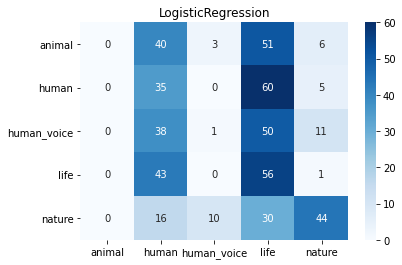

---------DecisionTreeClassifier---------------
accuracy: 0.404
recall: 0.404
f1 score: 0.403561
Cross Validation Score: [0.41747573 0.38834951 0.38349515 0.39320388 0.41747573]


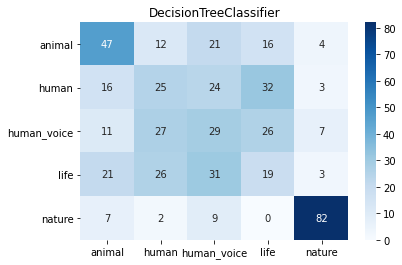

---------XGBClassifier---------------
accuracy: 0.448
recall: 0.448
f1 score: 0.444343
Cross Validation Score: [0.44174757 0.48543689 0.45145631 0.43203883 0.47087379]


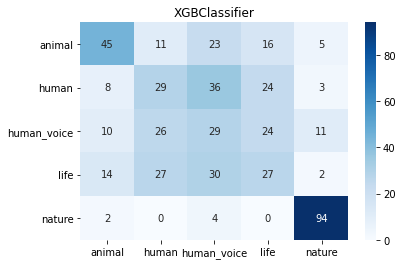

---------RandomForestClassifier---------------
accuracy: 0.43
recall: 0.43
f1 score: 0.417608
Cross Validation Score: [0.41747573 0.48058252 0.44174757 0.42718447 0.44660194]


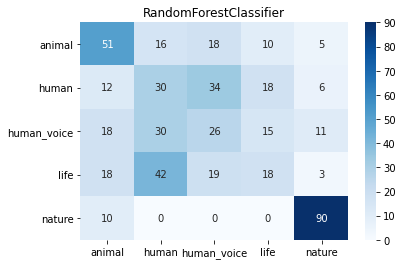

In [170]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

### 2. 모델 파라미터에 weights 적용하기
- abnomal 데이터에서 oversamping, undersamping 같은 개념으로 class_weights를 주어 라벨별 불균형을 맞출 수 있음
- 샘플링을 하지 않고, 개수가 제일 많은 human_voice을 기준점으로 두고 weights 적용
- life	91
human	308
animal	521
human_voice	10870

In [187]:
weights = {'animal': 3, 'human': 4, 'life': 2.5} #, 'nature': 20}
X, y = make_train_test(long_df)
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)

X 개수:10020, y 개수:10020
             name
cate1            
nature        206
human         404
life          995
animal       1371
human_voice  7044
X 개수:450, y 개수:450
             name
cate1            
life           50
animal        100
human_voice   100
human         200


---------LogisticRegression---------------
accuracy: 0.464444
recall: 0.29625
f1 score: 0.249191
Cross Validation Score: [0.29302736 0.32899382 0.28111209 0.27890556 0.28927626]


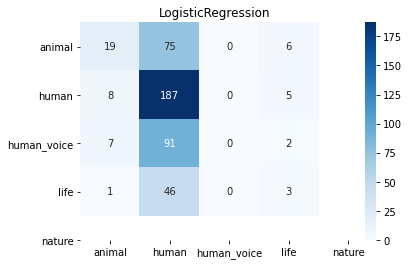

---------DecisionTreeClassifier---------------
accuracy: 0.357778
recall: 0.37875
f1 score: 0.316974
Cross Validation Score: [0.85127979 0.8417917  0.84708738 0.85988526 0.85326567]


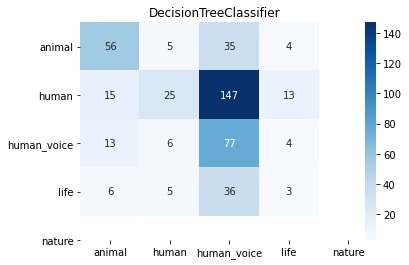

---------XGBClassifier---------------
[16:27:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.362222
recall: 0.40625
f1 score: 0.295653
[16:27:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:32] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not

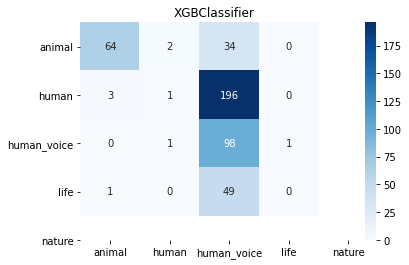

---------RandomForestClassifier---------------
accuracy: 0.364444
recall: 0.3975
f1 score: 0.304808
Cross Validation Score: [0.9331421  0.9298323  0.9331421  0.93534863 0.93843778]


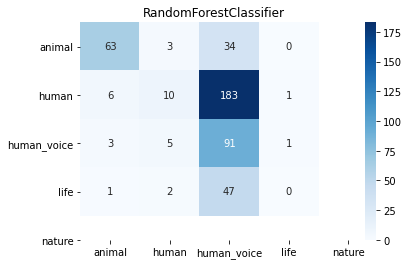

In [188]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression(class_weight=weights))
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier(class_weight=weights))
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss',
                                           scale_pos_weight=10))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(class_weight=weights,
                                                             n_estimators=10, random_state=13, oob_score=True))

### 3. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [193]:
X_test, y_test = make_train_test(test_df)
train_df = long_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate1').count()

X 개수:500, y 개수:500
             name
cate1            
animal        100
human         100
human_voice   100
life          100
nature        100
X 개수:9520, y 개수:9520
             name
cate1            
nature        106
human         304
life          895
animal       1271
human_voice  6944


,index
cate1,
animal,7126
human,6915
human_voice,6944
life,7026
nature,6931


---------LogisticRegression---------------
accuracy: 0.3
recall: 0.3
f1 score: 0.246953
Cross Validation Score: [0.30596699 0.36972775 0.3501693  0.29190181 0.314193  ]


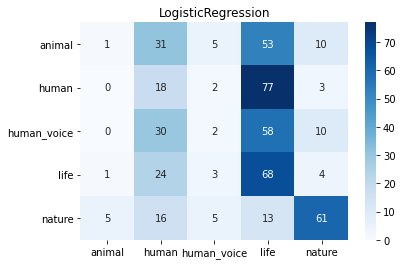

---------DecisionTreeClassifier---------------
accuracy: 0.36
recall: 0.36
f1 score: 0.355247
Cross Validation Score: [0.75440824 0.75694738 0.75677201 0.7602991  0.76128668]


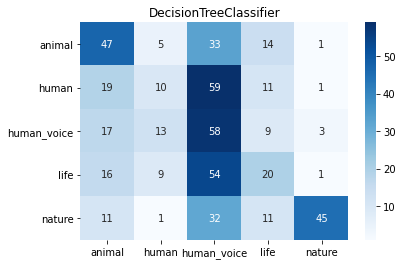

---------XGBClassifier---------------
accuracy: 0.438
recall: 0.438
f1 score: 0.387399
Cross Validation Score: [0.83820003 0.84765129 0.83747178 0.83422686 0.84156321]


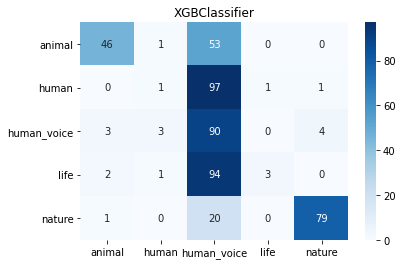

---------RandomForestClassifier---------------
accuracy: 0.386
recall: 0.386
f1 score: 0.354596
Cross Validation Score: [0.83128791 0.83340387 0.8398702  0.83549661 0.84311512]


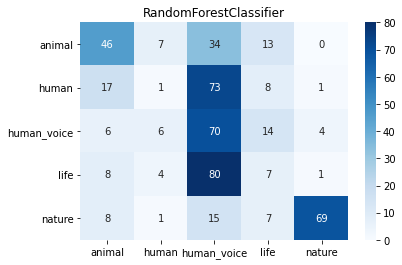

In [194]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---
# HDBSCAN
- 이제는 더 이상 라벨별 군집이 보이지는 않습니다..ㅎㅎ

In [87]:
import hdbscan
from sklearn.manifold import TSNE
import seaborn as sns

In [98]:
test_df

,name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,path,noise,cate1,cate2
1750,4-195497-A-11,0.670644,0.036772,0.070420,0.001942,2611.569005,1.082713e+05,2483.187622,8031.645627,5103.817749,...,-1.881885,12.852496,-7.082438,10.905033,-2.787996,13.877308,../sounds/nature/물 소리/4-195497-A-11.wav,물 소리,nature,물 소리
1705,4-156993-A-19,0.623087,0.050638,0.068568,0.005266,1624.303330,5.153216e+05,2043.558554,180933.672150,3281.620280,...,2.122416,14.651430,-0.041226,13.866878,4.255538,12.155055,../sounds/nature/천둥 소리/4-156993-A-19.wav,천둥 소리,nature,천둥 소리
1706,5-156999-C-19,0.651007,0.055119,0.449997,0.029722,443.144171,3.593449e+04,845.349321,54097.641911,815.370687,...,4.253403,17.472353,4.308574,18.632238,3.430974,17.181170,../sounds/nature/천둥 소리/5-156999-C-19.wav,천둥 소리,nature,천둥 소리
1734,4-204618-A-11,0.688915,0.037810,0.102952,0.003314,2489.020565,1.245011e+04,1650.683629,3338.518949,4388.985189,...,-0.835719,13.896704,-8.980471,14.963535,5.193790,18.649313,../sounds/nature/물 소리/4-204618-A-11.wav,물 소리,nature,물 소리
1769,4-180380-A-10,0.695229,0.031718,0.064553,0.000045,3262.005912,8.094219e+04,2957.918849,14794.112685,7151.715088,...,0.698232,7.752073,-4.195013,9.811828,1.250620,12.007769,../sounds/nature/비 소리/4-180380-A-10.wav,비 소리,nature,비 소리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19715,3_3375,0.379148,0.109828,0.052183,0.002873,2117.256401,1.248839e+06,2157.126545,372318.823618,4055.115781,...,-0.542095,268.867004,-1.213177,204.615494,3.654195,169.127731,../sounds/human_voice/read_women/4_3349.wav,NaN,human_voice,read_women
2494,4_0625,0.348644,0.111275,0.065895,0.003428,1915.251471,8.284139e+05,2053.194431,306654.636827,3725.379570,...,-0.511948,236.338791,1.468831,307.118256,4.590524,293.766693,../sounds/human_voice/read_women/3_0719.wav,NaN,human_voice,read_women
20134,4_5569,0.432584,0.106439,0.053098,0.003107,2384.639760,2.268070e+06,2304.875890,445386.829684,4629.638672,...,-0.300045,207.318146,-2.295184,145.006836,0.012963,78.931885,../sounds/human_voice/read_women/4_5194.wav,NaN,human_voice,read_women
14613,bM32LJFpAus.0161,0.497197,0.119185,0.060465,0.005010,1525.148396,1.132423e+06,1977.664590,571894.365534,3232.017393,...,-3.689623,88.556099,-0.491071,49.063557,1.630206,49.976978,../sounds/human_voice/read_women/sub100122a001...,NaN,human_voice,read_women


In [97]:
tsne = TSNE()
tsne_fit = tsne.fit_transform(X_test)
tsne_df = pd.DataFrame(tsne_fit, index=X_test.index, columns=['x', 'y'])

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100]


,x,y,hdbscan,y_pred,cate1,cate2
path,,,,,,
../sounds/human/코 고는 소리/4-183882-A-28.wav,-33.432373,8.380649,51,nature,nature,human_voice
../sounds/life/클릭 소리/3-155556-A-31.wav,-4.661577,-41.007442,80,nature,nature,human_voice
../sounds/human_voice/read_men/jYYHDnEnnDY.0157.wav,16.990366,-34.882889,-1,nature,nature,human_voice
../sounds/life/사이렌 소리/4-67358-A-42.wav,-1.279642,-46.318794,93,nature,nature,animal
../sounds/animal/말 소리/horsey.wav,8.369486,12.519731,-1,nature,nature,human
...,...,...,...,...,...,...
../sounds/human/sighing/COQR_7_12_0_19_0_0_0.wav,-31.346272,24.653008,35,human_voice,human_voice,human_voice
../sounds/animal/cats_dog_add_noise/cat_165_1.wav,-3.202003,-43.032444,88,human_voice,human_voice,animal
../sounds/human_voice/original_noise/n_043.mp3,-0.164875,-45.785755,93,human_voice,human_voice,human_voice


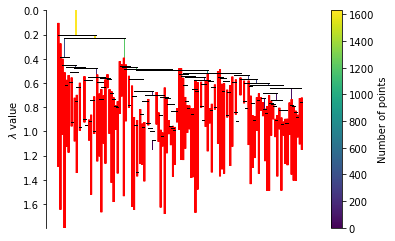

In [109]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=1, gen_min_span_tree=True,prediction_data=True)
clusterer.fit(tsne_df)
# 예측 데이터 생성
pred_hds = clusterer.fit_predict(tsne_df)
print(np.unique(pred_hds))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
hdbscan_df = tsne_df.copy()
hdbscan_df['hdbscan'] = pred_hds
hdbscan_df['y_pred'] = test_df['cate1'].tolist()
hdbscan_df['cate1'] = test_df['cate1'].tolist()
hdbscan_df['cate2'] = rf_y_pred.tolist()
hdbscan_df

In [110]:
hdbscan_df.groupby(['cate1', 'cate2', 'hdbscan']).count()

x  y  y_pred
cate1  cate2  hdbscan              
animal animal -1       2  2       2
               0       1  1       1
               4       1  1       1
               9       1  1       1
               19      1  1       1
...                   .. ..     ...
nature life    80      1  1       1
               84      1  1       1
       nature  67      1  1       1
               86      1  1       1
               96      1  1       1

[706 rows x 3 columns]

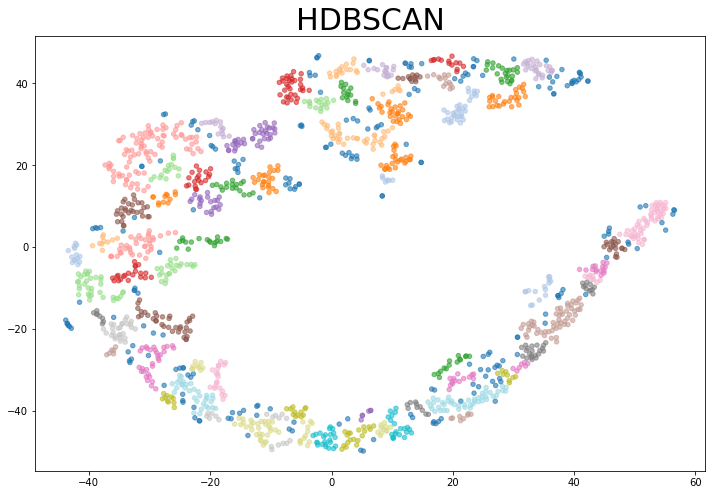

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(hdbscan_df['x'], hdbscan_df['y'], c=hdbscan_df["hdbscan"].tolist(), s=20, cmap="tab20", alpha=0.6)
ax.set_title("HDBSCAN", fontsize=30)
fig.show()

In [113]:
px.scatter(hdbscan_df, x='x', y='y',color='y_pred', hover_name='hdbscan')